In [ ]:
import pandas as pd
reading=pd.read_csv("random_sales_data.csv")
print(reading)

# Daily Revenue Calculation from Sales Data

## Introduction
In this analysis, we calculate the daily revenue from sales data. The dataset contains information about sales transactions including the date, quantity sold, and unit price.

## Data Loading and Preprocessing
We start by loading the sales data from a CSV file named 'random_sales_data.csv'. We then calculate the daily revenue by multiplying the quantity sold by the unit price for each transaction.

```python
import pandas as pd

# Let's read the uploaded CSV file
df_uploaded = pd.read_csv('random_sales_data.csv')

# Calculate daily revenue by multiplying 'Quantity' by 'Unit Price' for each row
df_uploaded['Daily Revenue'] = df_uploaded['Quantity'] * df_uploaded['Unit Price']


In [ ]:
# Let's read the uploaded CSV file
df_uploaded = pd.read_csv('random_sales_data.csv')

# Calculate daily revenue by multiplying 'Quantity' by 'Unit Price' for each row
df_uploaded['Daily Revenue'] = df_uploaded['Quantity'] * df_uploaded['Unit Price']

# To aggregate daily revenue, we group by 'Date' and sum up the 'Daily Revenue'
daily_revenue = df_uploaded.groupby('Date')['Daily Revenue'].sum().reset_index()

daily_revenue.head()  # Display the first few rows of the daily revenue calculation


In [ ]:
product_perfomance=df_uploaded.groupby("Product")["Daily Revenue"].sum().reset_index()
top_product=product_perfomance.sort_values("Daily Revenue",ascending=False).head(1)
top_product



In [ ]:
# Calculate the highest average unit price by category
avg_unit_price_by_category = df_uploaded.groupby('Category')['Unit Price'].mean().reset_index()

# Find the category with the highest average unit price
category_highest_avg_price = avg_unit_price_by_category.sort_values('Unit Price', ascending=False).head(1)

# Calculate the total quantity sold by category
quantity_sold_by_category = df_uploaded.groupby('Category')['Quantity'].sum().reset_index()

# Find the category with the highest volume of items sold
category_highest_volume_sold = quantity_sold_by_category.sort_values('Quantity', ascending=False).head(1)

category_highest_avg_price, category_highest_volume_sold


In [ ]:
# Calculate the correlation between the quantity sold and the revenue for each product
correlation_matrix = df_uploaded[['Quantity', 'Daily Revenue']].corr()

correlation_matrix


# Analysis of Daily Revenue Over Time

## Introduction
In this analysis, we visualize the trend of daily revenue over time using sales data. The dataset contains information about sales transactions including the date, quantity sold, and unit price.

## Data Description
The sales data is stored in a CSV file named 'random_sales_data.csv'. Each row represents a sales transaction, with columns including:
- **Date**: The date of the transaction.
- **Quantity**: The quantity of items sold in the transaction.
- **Unit Price**: The price of each unit sold.

## Data Preprocessing
- The 'Date' column is converted to datetime format to facilitate time-based analysis.
- Daily revenue is calculated by multiplying the quantity sold by the unit price for each transaction.

## Analysis
The daily revenue is aggregated by summing up the revenue for each day.
A line plot is used to visualize the trend of daily revenue over time.

## Visualization
The line plot illustrates the fluctuations in daily revenue over the analyzed period.
Insights from this visualization can aid in understanding sales patterns and identifying peak periods of revenue generation.

## Conclusion
Analyzing the trend of daily revenue over time provides valuable insights into the sales performance of the business. This information can be used to make informed decisions and optimize strategies for revenue growth.


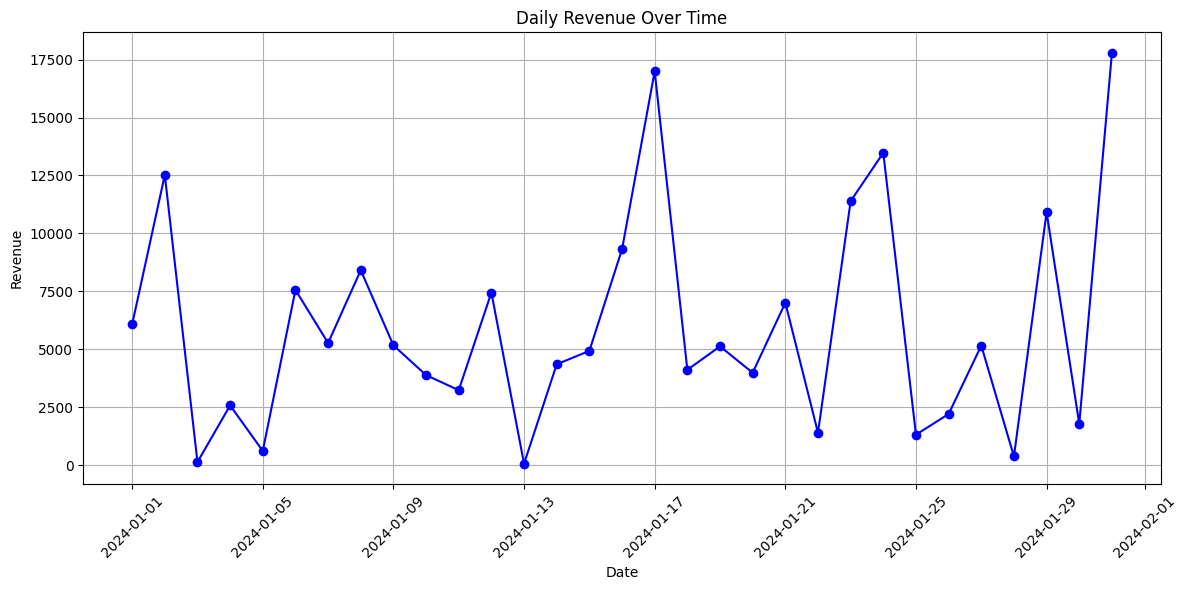

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('random_sales_data.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily revenue ('Quantity' * 'Unit Price')
df['Revenue'] = df['Quantity'] * df['Unit Price']

# Group by 'Date' and sum up the 'Revenue' for each day
daily_revenue = df.groupby(df['Date'].dt.date)['Revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', linestyle='-', color='blue')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


# Analysis of Product Performance by Total Revenue

## Introduction
In this analysis, we examine the total revenue generated by each product across the month. The dataset contains information about sales transactions, including the product name and revenue.

## Data Processing
We group the sales data by the product and calculate the total revenue for each product. The resulting dataframe, `product_performance`, shows the total revenue per product.

```python
# Calculate total revenue per product across the month
product_performance = df.groupby('Product')['Revenue'].sum().reset_index()

# Sorting the products by their total revenue to make the chart easier to read
product_performance_sorted = product_performance.sort_values('Revenue', ascending=False)


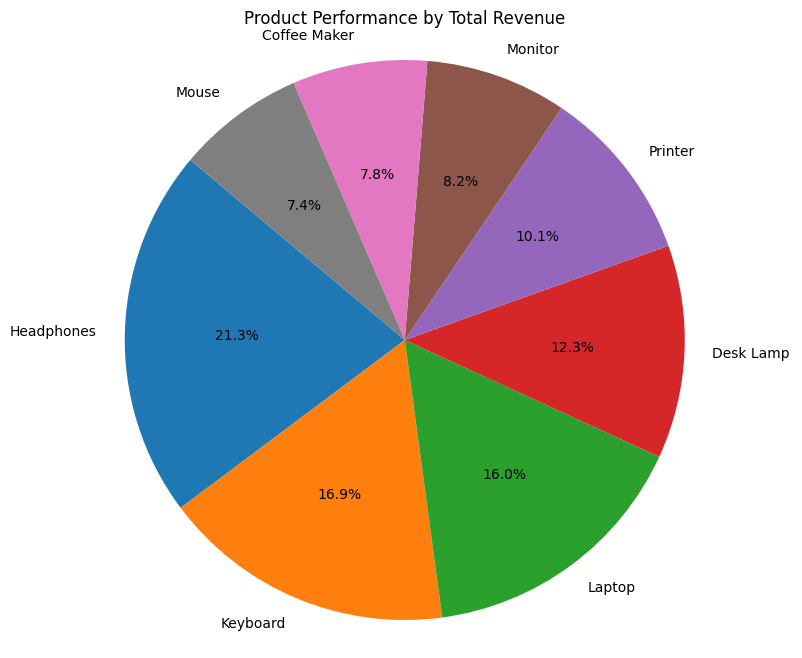

In [19]:
# Calculate total revenue per product across the month
product_performance = df.groupby('Product')['Revenue'].sum().reset_index()

# Sorting the products by their total revenue to make the chart easier to read
product_performance_sorted = product_performance.sort_values('Revenue', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(product_performance_sorted['Revenue'], labels=product_performance_sorted['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Product Performance by Total Revenue')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Category Analysis: Average Unit Price & Total Quantity Sold

## Introduction
This analysis explores the relationship between the average unit price and the total quantity sold for each product category. The dataset contains sales transaction data including the category, unit price, and quantity sold.

## Data Processing
The dataset is grouped by category, and the average unit price and total quantity sold are calculated for each category. The resulting dataset, named `category_analysis`, provides insights into the sales performance of different product categories.

## Visualization
A dual-axis bar chart is created to visualize the relationship between average unit price and total quantity sold:
- The primary Y-axis represents the total quantity sold for each category, shown as blue bars.
- The secondary Y-axis represents the average unit price for each category, shown as green bars.

## Interpretation
The dual-axis bar chart facilitates comparison between the average unit price and total quantity sold for each category. It helps identify categories where higher unit prices may correlate with higher or lower quantities sold, offering insights for pricing and marketing strategies.

## Conclusion
Analyzing the relationship between average unit price and total quantity sold by category aids in understanding sales dynamics and optimizing product offerings to maximize revenue and profitability.


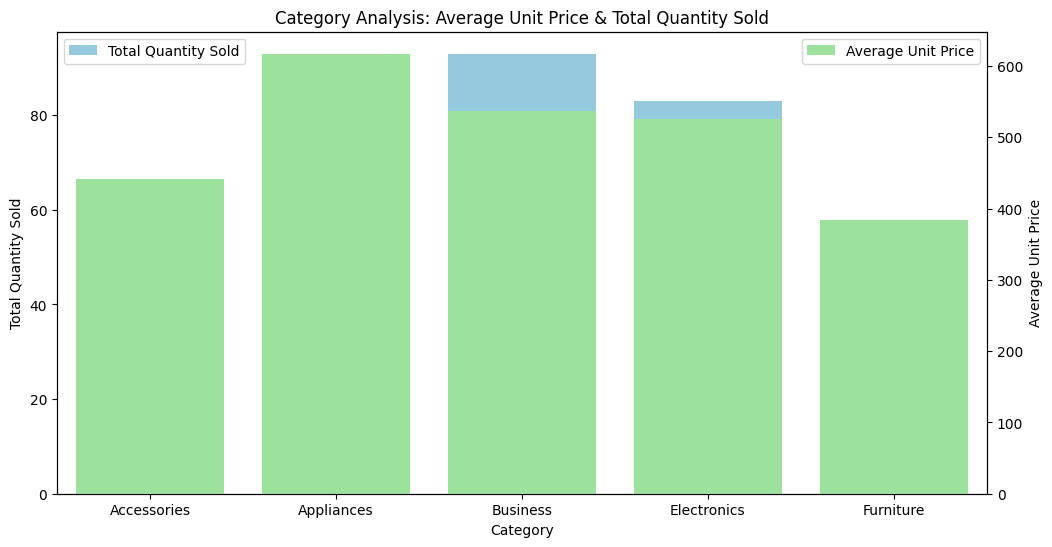

In [21]:
import seaborn as sns

# Calculate average unit price and total quantity sold per category
category_analysis = df.groupby('Category').agg(Average_Unit_Price=('Unit Price', 'mean'),
                                                Total_Quantity_Sold=('Quantity', 'sum')).reset_index()

# Creating a dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total quantity sold
sns.barplot(x='Category', y='Total_Quantity_Sold', data=category_analysis, ax=ax1, color='skyblue', label='Total Quantity Sold')
ax1.set_ylabel('Total Quantity Sold')
ax1.set_title('Category Analysis: Average Unit Price & Total Quantity Sold')
ax1.legend(loc='upper left')

# Creating a secondary Y-axis for average unit price
ax2 = ax1.twinx()
sns.barplot(x='Category', y='Average_Unit_Price', data=category_analysis, ax=ax2, color='lightgreen', label='Average Unit Price')
ax2.set_ylabel('Average Unit Price')
ax2.legend(loc='upper right')

plt.show()
